# 인공지능
## 지도학습: 문제, 정답을 알려주고 패턴을 찾는 것
* 분류분석, 회귀분석
## 비지도학습: 문제만 알려주고 알고리즘이 알아서 패턴을 찾는 것
* 군집분석

# 분류 분석의 대표적인 알고리즘 Tree 기반 모델
# 의사결정나무 (Decision Tree)
* Decision Tree는 데이터를 분할해서 조건문처럼 분기해 나가면서 예측하는 Tree 기반 모델
* 스무고개와 비슷하게 계속 질문을 던져서 분리
## 장점
* 직관적이고 해석 쉬움
* feature scaling(변수) 필요 없음 (MinMax, StandardScaler 사용을 하지 않아도 됨)
* 범주형(DecisionTreeClassifier), 수치형(DecisionTreeRegressor) 자료 모두를 분석할 수 있음
* 시각화가 쉽고 직관적
## 단점
* 과적합(overfitting)이 잘 일어남
* 최적의 트리를 찾기가 어렵고 시간이 오래 걸릴 수 있음




0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
2. 데이터 전처리 (결측값 처리, 이상값 탐지)
3. EDA(탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로, 문자 -> 숫자, 상관관계)
4. feature Engineering(변수 선택, 새로운 특성 생성, 카텓=고리 변수의 더미 변수화 (one-hot encoding)
5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. sklearn에서 DecisionTreeClassifier을 불러와서 모델 훈련
8. test 세트를 모델에 넣어서 예측값 생성(pred)
9. accuracy_score(), classificatio_report()를 이용해서 모델의 성능 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/Titanic_train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
data = data.drop(['Cabin'], axis = 1)

In [8]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


In [9]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'].isna().sum()

np.int64(0)

In [11]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].isna().sum()

np.int64(0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


이상값 탐지

<Axes: >

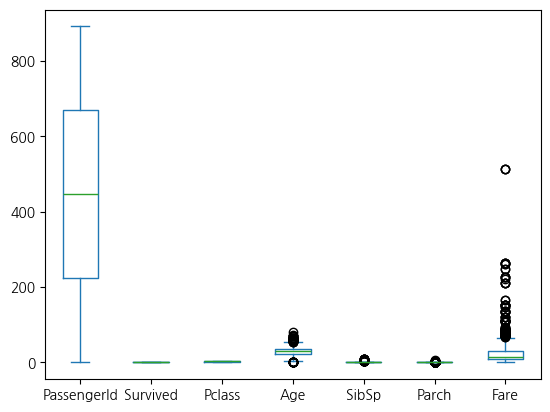

In [16]:
data.plot(kind='box')

In [17]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
fare_desc= data['Fare'].describe()

In [22]:
print(fare_desc, type(fare_desc))

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64 <class 'pandas.core.series.Series'>


In [24]:
upper_bound = fare_desc['75%'] + (1.5 * (fare_desc['75%'] - fare_desc['25%']))
print(upper_bound)

65.6344


In [25]:
outliers = data[data['Fare'] > upper_bound]

In [26]:
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


In [27]:
fare_desc_pclass = data[['Pclass', 'Fare']].groupby('Pclass').describe()
fare_desc_pclass

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [ ]:
data['Fare'].max()

In [28]:
fare_desc_pclass.columns

MultiIndex([('Fare', 'count'),
            ('Fare',  'mean'),
            ('Fare',   'std'),
            ('Fare',   'min'),
            ('Fare',   '25%'),
            ('Fare',   '50%'),
            ('Fare',   '75%'),
            ('Fare',   'max')],
           )

In [30]:
p1_upper_bound = fare_desc_pclass.loc[1, ('Fare', '75%')] + (1.5 * fare_desc_pclass.loc[1,('Fare', '75%')] - fare_desc_pclass.loc[1, ('Fare', '25%')])
p1_upper_bound

np.float64(202.82605)

In [32]:
data['Fare'].max()

np.float64(512.3292)

In [33]:
p1_outlier = data[data['Fare'] > p1_upper_bound]
p1_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S


EDA

In [34]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: ylabel='count'>

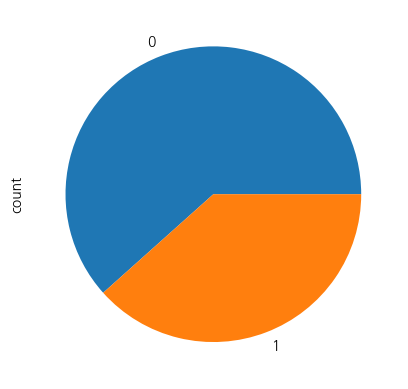

In [35]:
data['Survived'].value_counts().plot(kind="pie")

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: xlabel='Pclass'>

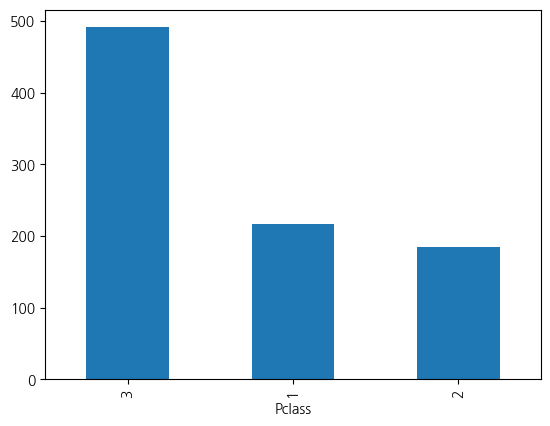

In [37]:
data['Pclass'].value_counts().plot(kind='bar')

In [38]:
data['Name'].nunique()

891

In [39]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

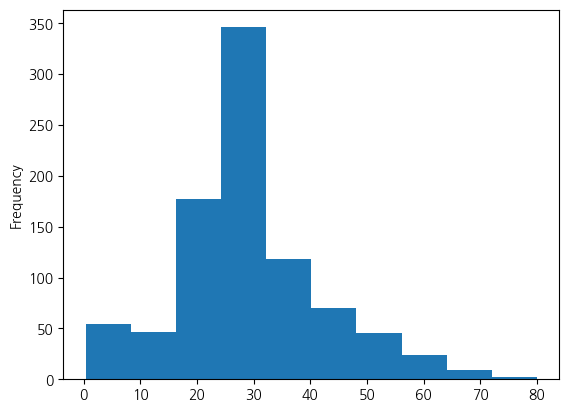

In [41]:
data['Age'].plot(kind='hist')

<Axes: xlabel='SibSp'>

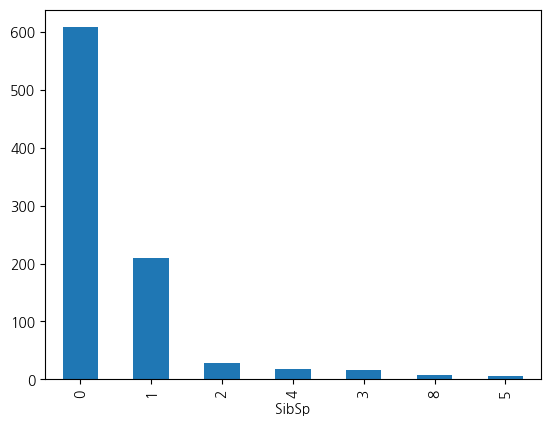

In [42]:
data['SibSp'].value_counts().plot(kind='bar')

<Axes: xlabel='Parch'>

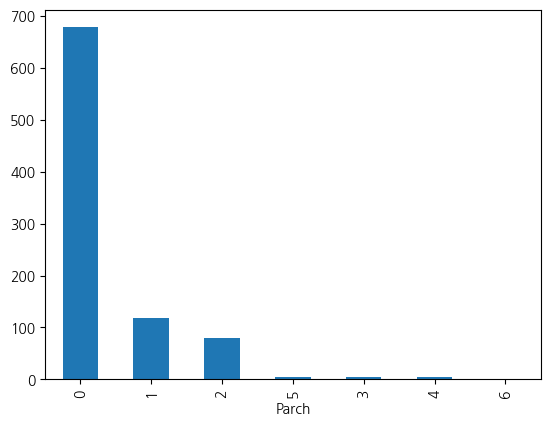

In [43]:
data['Parch'].value_counts().plot(kind='bar')

In [44]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [47]:
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [48]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [49]:
data[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [50]:
data[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [51]:
data[['Survived', 'SibSp']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [52]:
data[['Survived', 'Parch']].groupby('Parch').mean().sort_values(by='Survived',
                                                               ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [53]:
data[['Survived', 'Embarked']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [55]:
data['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [56]:
data['Age'].max()

np.float64(80.0)

In [57]:
data['Age'] = pd.cut(data['Age'], 
       bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       labels = ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
                    right=False)

In [60]:
data[data['Age'] == '80s']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
630,1,1,male,80s,0,0,30.0,S


In [62]:
data[['Survived', 'Age']].groupby('Age').mean()

C:\Users\vbak0\AppData\Local\Temp\ipykernel_29836\1401584837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['Survived', 'Age']].groupby('Age').mean()


,Survived
Age,
under10s,0.612903
10s,0.401961
20s,0.324937
30s,0.437126
40s,0.382022
50s,0.416667
60s,0.315789
70s,0.000000
80s,1.000000


In [63]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [64]:
data[['Survived', 'Embarked']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [65]:
data['Family'] = data['SibSp'] + data['Parch']
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,20s,1,0,7.2500,S,1
1,1,1,female,30s,1,0,71.2833,C,1
2,1,3,female,20s,0,0,7.9250,S,0
3,1,1,female,30s,1,0,53.1000,S,1
4,0,3,male,30s,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,20s,0,0,13.0000,S,0
887,1,1,female,10s,0,0,30.0000,S,0
888,0,3,female,20s,1,2,23.4500,S,3
889,1,1,male,20s,0,0,30.0000,C,0


In [66]:
data.drop(['SibSp', 'Parch'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,20s,1,0,7.2500,S,1
1,1,1,female,30s,1,0,71.2833,C,1
2,1,3,female,20s,0,0,7.9250,S,0
3,1,1,female,30s,1,0,53.1000,S,1
4,0,3,male,30s,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,20s,0,0,13.0000,S,0
887,1,1,female,10s,0,0,30.0000,S,0
888,0,3,female,20s,1,2,23.4500,S,3
889,1,1,male,20s,0,0,30.0000,C,0


In [67]:
data[['Survived', 'Family']].groupby('Family').mean().sort_values(by='Survived', ascending=False)

,Survived
Family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [69]:
data[['Survived', 'Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex', 'Age']).mean().sort_values(by="Survived", ascending=False)

C:\Users\vbak0\AppData\Local\Temp\ipykernel_29836\2705320046.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['Survived', 'Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex', 'Age']).mean().sort_values(by="Survived", ascending=False)


Survived
Pclass Sex    Age               
1      female 10s       1.000000
              30s       1.000000
              60s       1.000000
              40s       1.000000
       male   under10s  1.000000
2      female 10s       1.000000
              under10s  1.000000
3      female 60s       1.000000
2      male   under10s  1.000000
1      male   80s       1.000000
       female 20s       0.960000
2      female 30s       0.941176
1      female 50s       0.916667
2      female 40s       0.900000
              20s       0.888889
              50s       0.833333
3      female 20s       0.547945
              10s       0.541667
              under10s  0.523810
1      male   30s       0.521739
3      female 30s       0.437500
1      male   10s       0.400000
3      male   under10s  0.380952
1      male   40s       0.375000
              20s       0.358974
2      male   60s       0.333333
1      male   50s       0.266667
3      male   30s       0.150943
              20s       0.127551
2      male   40s       0.125000
1      male   60s       0.100000
2      male   10s       0.100000
              30s       0.096774
3      male   10s       0.095238
              40s       0.080000
2      male   20s       0.054054
1      female under10s  0.000000
       male   70s       0.000000
2      male   50s       0.000000
              70s       0.000000
3      female 40s       0.000000
       male   50s       0.000000
              60s       0.000000
              70s       0.000000
1      female 70s            NaN
              80s            NaN
2      female 60s            NaN
              70s            NaN
              80s            NaN
       male   80s            NaN
3      female 50s            NaN
              70s            NaN
              80s            NaN
       male   80s            NaN

문자데이터 숫자로 인코딩, 

In [70]:
data.drop('Fare', axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,20s,1,0,7.2500,S,1
1,1,1,female,30s,1,0,71.2833,C,1
2,1,3,female,20s,0,0,7.9250,S,0
3,1,1,female,30s,1,0,53.1000,S,1
4,0,3,male,30s,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,20s,0,0,13.0000,S,0
887,1,1,female,10s,0,0,30.0000,S,0
888,0,3,female,20s,1,2,23.4500,S,3
889,1,1,male,20s,0,0,30.0000,C,0


In [71]:
pd.get_dummies(data, columns=['Sex', 'Age', 'Embarked', 'Family'], drop_first=True)

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Age_10s,Age_20s,Age_30s,Age_40s,...,Embarked_Q,Embarked_S,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,0,3,1,0,7.2500,True,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
1,1,1,1,0,71.2833,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,1,3,0,0,7.9250,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,1,0,53.1000,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
4,0,3,0,0,8.0500,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
887,1,1,0,0,30.0000,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
888,0,3,1,2,23.4500,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
889,1,1,0,0,30.0000,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# 독립변수 (문제, X) 종속변수 (답, y)

In [72]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [73]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,male,20s,1,0,7.2500,S,1
1,1,female,30s,1,0,71.2833,C,1
2,3,female,20s,0,0,7.9250,S,0
3,1,female,30s,1,0,53.1000,S,1
4,3,male,30s,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,20s,0,0,13.0000,S,0
887,1,female,10s,0,0,30.0000,S,0
888,3,female,20s,1,2,23.4500,S,3
889,1,male,20s,0,0,30.0000,C,0


In [74]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 데이터를 훈련 데이터와 테스트 데이터로 분할
# 홀드아웃

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 분석 모델 선택 및 분석

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [88]:
data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [83]:
dtc = DecisionTreeClassifier(random_state=777)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

ValueError: could not convert string to float: 'male'